__Curate longitudinal dataset based on Ann-Kathrins pathology labels__

In [1]:
import os
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')
sys.path.insert(0, '/home/jovyan/mne-python/')
import pickle

import mne
import pandas as pd
import numpy as np

from braindecode.datasets.base import BaseDataset, BaseConcatDataset

from decode_tueg import extract_longitudinal_dataset, plot_longitudinal_interval_hists

In [28]:
description = pd.read_csv('/home/jovyan/mne_data/TUH/final_tuabEx_description.csv', index_col=0)
description.shape

(33660, 18)

In [ ]:
(description.n_samples/description.sfreq).min()

In [ ]:
df = extract_longitudinal_dataset(description, kind='transition', load=False)

In [142]:
df = extract_longitudinal_dataset(description, 'pathological', False)

n recs 18338 n subj 2892


In [136]:
df = extract_longitudinal_dataset(description, 'non_pathological', False)

n recs 4068 n subj 956


In [4]:
ds = extract_longitudinal_dataset(description, 'transition', True)

n recs 3357 n subj 525


In [6]:
with open('/home/jovyan/longitudinal/transition.pkl', 'wb') as f:
    pickle.dump(ds, f)

In [7]:
ds = extract_longitudinal_dataset(description, 'non_pathological', True)

n recs 4068 n subj 956


In [8]:
with open('/home/jovyan/longitudinal/non_pathological.pkl', 'wb') as f:
    pickle.dump(ds, f)

In [9]:
ds = extract_longitudinal_dataset(description, 'pathological', True)

n recs 18338 n subj 2892


In [10]:
with open('/home/jovyan/longitudinal/pathological.pkl', 'wb') as f:
    pickle.dump(ds, f)

__Plot longitudinal datasets__

In [1]:
import os
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')
sys.path.insert(0, '/home/jovyan/mne-python/')
import pickle

import torch
import numpy as np
import pandas as pd
from skorch.callbacks import Checkpoint
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_color_codes('deep')

from braindecode.preprocessing import Preprocessor, preprocess
from braindecode import EEGRegressor
from braindecode.models import ShallowFBCSPNet

# from decode_tueg import _create_windows as create_windows

/tmp/ipykernel_835/396139984.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def plot_age_hist2(description, ax=None, hue_key=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(15, 2))
    sns.histplot(
        data=description,
        bins=np.linspace(0,100,101,dtype=int),
        x='age',
        kde=True,
        ax=ax,
        hue=hue_key if description[hue_key].nunique() != 1 else None,
        palette=['b', 'r'] if description[hue_key].nunique() != 1 else None,
        color='r' if 0 not in description[hue_key].unique() else 'b',
    );
    return ax
    #ax.set_title(f'train (n={len(train_set.datasets)})')
    #fig.savefig('/home/jovyan/train_dist_wo_gender.jpg', bbox_inches='tight')

In [3]:
workspace = 'workspace-tueg'  # 'workspace-tueg', ''

In [4]:
with open(f'/home/jovyan/{workspace}/longitudinal/transition.pkl', 'rb') as f:
    ds = pickle.load(f)

In [5]:
ds.description.groupby('subject').head(1).gender.value_counts()

F    275
M    250
Name: gender, dtype: int64

In [7]:
ds.description.pathological.value_counts()

1    1848
0    1509
Name: pathological, dtype: int64

In [44]:
n_channels = len(ds[0][0])

Text(0, 0.5, 'Count')

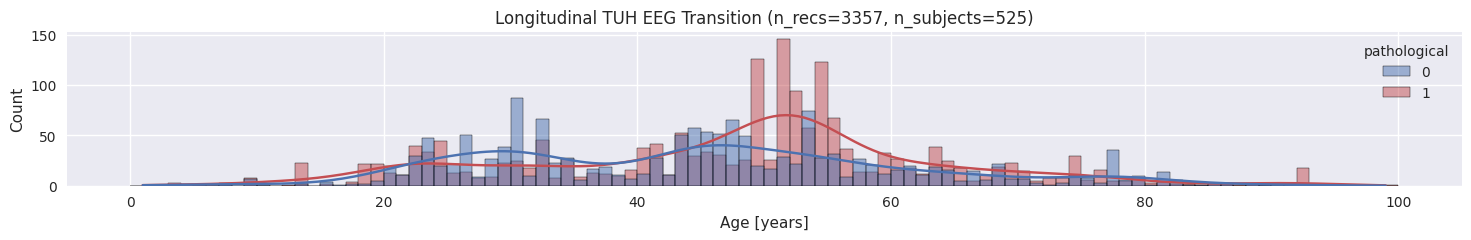

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(18, 2))
plot_age_hist2(ds.description, hue_key='pathological', ax=ax)
ax.set_title(f"Longitudinal TUH EEG Transition (n_recs={len(ds.description)}, "
             f"n_subjects={len(ds.description.groupby('subject'))})")
ax.set_xlabel('Age [years]')
ax.set_ylabel('Count')
# fig.savefig('/home/jovyan/longitudinal/transition_hist.jpg', bbox_inches='tight', dpi=300)

In [10]:
with open(f'/home/jovyan/{workspace}/longitudinal/non_pathological.pkl', 'rb') as f:
    ds = pickle.load(f)

In [13]:
ds.description.groupby('subject').head(1).gender.value_counts()

F    554
M    402
Name: gender, dtype: int64

In [36]:
for n, g in ds.description.groupby('subject'):
    assert g.pathological.nunique() == 1

Text(0, 0.5, 'Count')

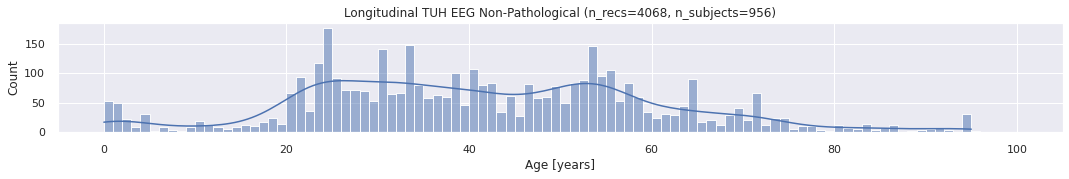

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(18, 2))
plot_age_hist2(ds.description, hue_key='pathological', ax=ax)
ax.set_title(f"Longitudinal TUH EEG Non-Pathological (n_recs={len(ds.description)}, "
             f"n_subjects={len(ds.description.groupby('subject'))})")
ax.set_xlabel('Age [years]')
ax.set_ylabel('Count')
# fig.savefig('/home/jovyan/longitudinal/non_pathological_hist.jpg', bbox_inches='tight', dpi=300)

In [16]:
with open(f'/home/jovyan/{workspace}/longitudinal/pathological.pkl', 'rb') as f:
    ds = pickle.load(f)

In [20]:
ds.description.groupby('subject').head(1).gender.value_counts()

M    1478
F    1414
Name: gender, dtype: int64

In [184]:
for n, g in ds.description.groupby('subject'):
    assert g.pathological.nunique() == 1

Text(0, 0.5, 'Count')

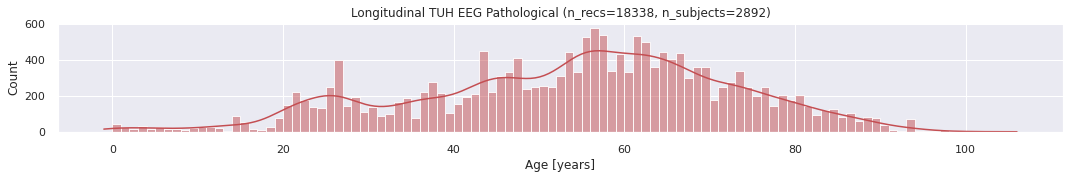

In [185]:
fig, ax = plt.subplots(1, 1, figsize=(18, 2))
plot_age_hist2(ds.description, hue_key='pathological', ax=ax)
ax.set_title(f"Longitudinal TUH EEG Pathological (n_recs={len(ds.description)}, "
             f"n_subjects={len(ds.description.groupby('subject'))})")
ax.set_xlabel('Age [years]')
ax.set_ylabel('Count')
# fig.savefig('/home/jovyan/longitudinal/pathological_hist.jpg', bbox_inches='tight', dpi=300)

In [22]:
import seaborn as sns
sns.set(color_codes=True)

In [23]:
from decode_tueg import age_pyramid

In [97]:
df = ds.description[['pathological', 'gender', 'age', 'subject']]
df['gender'] = df['gender'] == 'F'

In [75]:
df.shape

(3357, 4)

In [76]:
len(df.subject.unique())

525

In [77]:
for n, g in df.groupby(['gender', 'pathological']):
    print(n, g.shape)
    print(n, len(g.subject.unique()))
    print()

(False, 0) (654, 4)
(False, 0) 250

(False, 1) (786, 4)
(False, 1) 251

(True, 0) (855, 4)
(True, 0) 275

(True, 1) (1062, 4)
(True, 1) 275



In [78]:
855+1062+654+786

3357

In [79]:
275+250

525

In [80]:
# why has male non-pathological 250 and male pathological 251? should not happen! this is the transition dataset
# every subject should appear in pathological and non-pathological

In [87]:
subject_wise = False

In [88]:
df.groupby(['subject', 'pathological'], as_index=False).mean() if subject_wise else df

,pathological,gender,age,subject
0,1,False,49,5
1,1,False,49,5
2,1,False,50,5
3,0,False,51,5
4,1,False,52,5
...,...,...,...,...
3352,1,True,43,14951
3353,1,True,43,14951
3354,1,True,43,14951
3355,1,True,43,14951


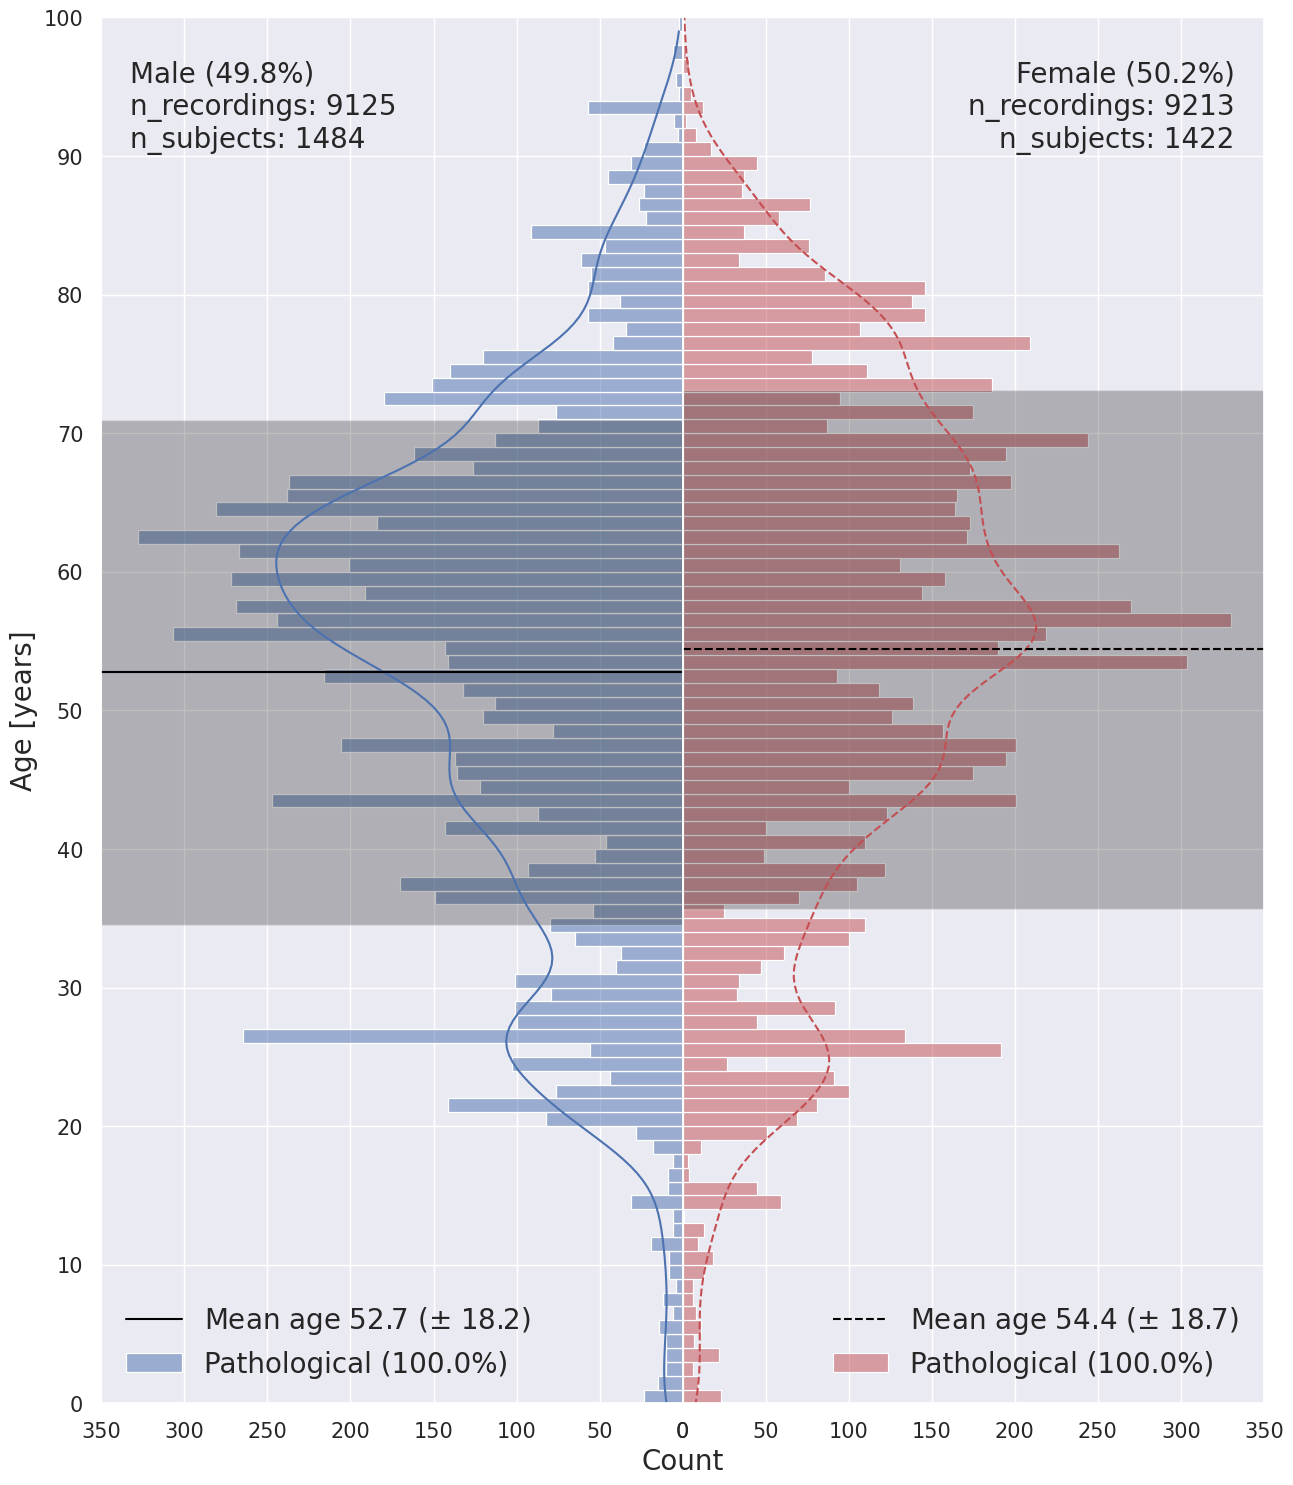

In [102]:
s = 'Recording' if not subject_wise else 'Subject'
ax = age_pyramid(
    df.groupby(['subject', 'pathological'], as_index=False).mean() if subject_wise else df, 
    f'Longitudinal Pathological {s}', 
    ylim=350 if not subject_wise else 22,
#     ylim=50,
    show_title=False,
    fs=20,
    #out_dir='/home/jovyan/', 
)
# ax.title(f'n_reorcings: {len(ds.datasets)}, n_subjects: {ds.description["subject"].nunique()}')
ax[0].get_figure().savefig('/home/jovyan/workspace-tueg/longitudinal_pathological_histogram.png', 
                           dpi=300, bbox_inches='tight')

In [90]:
print("hi")

hi


In [ ]:
# analyze time delta between recs of a subject

In [2]:
import pandas as pd
import seaborn as sns
sns.set_color_codes('deep')
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-2-48bf00a5b6e0>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
from decode_tueg import plot_longitudinal_interval_hists

In [4]:
# TODO: compute on session level as multiple recs in one session could bias average time?
# TODO: compute median as outliers could bias average time?

In [5]:
description = pd.read_csv('/home/lukas/Code/brain_age/ds_descriptions//final_tuabEx_description.csv', index_col=0)

n recs 18338 n subj 2892
[1] 77.39764340282274 361.38595158122297
n recs 4068 n subj 956
[0] 110.46433161953728 475.90659495682786
n recs 3357 n subj 525
[1 0] 214.64583333333334 609.9279473375996


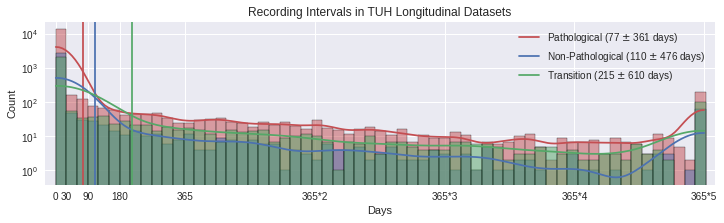

In [6]:
# this uses entire tuabex description
ax = plot_longitudinal_interval_hists(description)
# ax.get_figure().savefig('/home/jovyan/recording_intervals.jpg', dpi=300, bbox_inches='tight')

In [7]:
ds = {'Transition': [], 'Pathological': [], 'Non-pathological': []}
for subj, g in description.groupby('subject'):
    if len(g) < 2:
        continue
    if g.pathological.nunique() == 1:
        if g.pathological.iloc[0] == 0:
            ds['Non-pathological'].append(g)
        elif g.pathological.iloc[0] == 1:
            ds['Pathological'].append(g)
        else:
            raise ValueError
    elif g.pathological.nunique() == 2:
        ds['Transition'].append(g)
    else:
        raise ValueError

In [8]:
transition = pd.concat(ds['Transition'])

In [9]:
transition['Longitudinal'] = 'Transition'

In [10]:
transition.shape, transition.subject.nunique()

((3357, 19), 525)

In [11]:
(transition.groupby('subject').size() > 1).sum()

525

In [12]:
non_pathological = pd.concat(ds['Non-pathological'])

In [13]:
non_pathological['Longitudinal'] = 'Non-pathological'

In [14]:
non_pathological.shape, non_pathological.subject.nunique()

((4068, 19), 956)

In [15]:
(non_pathological.groupby('subject').size() > 1).sum()

956

In [16]:
pathological = pd.concat(ds['Pathological'])

In [17]:
pathological['Longitudinal'] = 'Pathological'

In [18]:
pathological.shape, pathological.subject.nunique()

((18338, 19), 2892)

In [19]:
(pathological.groupby('subject').size() > 1).sum()

2892

In [20]:
df = pd.concat([non_pathological, pathological, transition])

In [21]:
# count n_recordings per subject'
n_recs_per_subject = df.groupby(['Longitudinal', 'subject'], as_index=False).size()

In [22]:
n_recs_per_subject = n_recs_per_subject.sort_values('Longitudinal')

In [23]:
(n_recs_per_subject.size > 2).all()

True

In [24]:
from decode_tueg import extract_longitudinal_dataset

In [25]:
import numpy as np
from datetime import datetime, timedelta

In [26]:
#fig, ax_arr = plt.subplots(1, 3, figsize=(12,5), sharex=True, sharey=True)
day_diffs = []
for j, ds_kind in enumerate(['transition', 'non_pathological', 'pathological']):
    df_trans = extract_longitudinal_dataset(description, ds_kind, False)
    if ds_kind == 'transition':
        ds_name = 'Transition'
    if ds_kind == 'non_pathological':
        ds_name = 'Non-pathological' 
    if ds_kind == 'pathological':
        ds_name = 'Pathological' 

    for subj, group in df_trans.groupby('subject'):
        #print(subj)
        dates = [datetime(y, m, d) for i, (y, m, d) in group[['year', 'month', 'day']].iterrows()]
        for i in range(1, len(dates)):
            #print(i, (dates[i] - dates[0]).days)
            day_diffs.append((ds_name, (dates[i] - dates[i-1]).days, subj))

n recs 3357 n subj 525
n recs 4068 n subj 956
n recs 18338 n subj 2892


In [27]:
df = pd.DataFrame(day_diffs, columns=['Dataset', 'Interval [days]', 'Subject'])

In [28]:
df.shape

(21390, 3)

In [29]:
df = df.sort_values('Dataset')

In [30]:
df.groupby('Dataset').mean()

,Interval [days],Subject
Dataset,,
Non-pathological,110.571015,8674.297558
Pathological,77.458501,9223.782274
Transition,214.781780,7636.902895


In [31]:
df.groupby('Dataset').median()

,Interval [days],Subject
Dataset,,
Non-pathological,0.0,9610.0
Pathological,0.0,10306.0
Transition,0.0,8440.0


In [32]:
# non-zero median interval
df[df['Interval [days]'] > 0].groupby('Dataset').median()

,Interval [days],Subject
Dataset,,
Non-pathological,141.5,8492.0
Pathological,31.0,6468.0
Transition,249.5,5270.0


In [56]:
n_recs_per_subject.groupby(['Longitudinal']).mean()

,subject,size
Longitudinal,,
Non-pathological,7515.673640,4.255230
Pathological,7023.203320,6.340941
Transition,6063.247619,6.394286


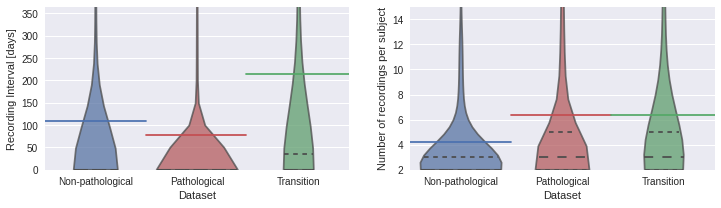

In [57]:
fig, ax_arr = plt.subplots(1, 2, figsize=(12, 3))
ax = ax_arr[1]
ax = sns.violinplot(
    data=n_recs_per_subject, 
    x='Longitudinal', 
    y='size', 
    inner='quartile',
    cut=0,
    palette=['b', 'r', 'g'], 
    ax=ax,
)
ax.set_ylim(2, 15)
ax.set_ylabel('Number of recordings per subject')
ax.set_xlabel('Dataset')
ax.axhline(4.255, 0, .33, c='b', label='mean')
ax.axhline(6.341, .33, .66, c='r', label='mean')
ax.axhline(6.394, .66, 1, c='g', label='mean')

ax = ax_arr[0]
ax = sns.violinplot(
    data=df,
    y='Interval [days]',
    x='Dataset', 
    inner='quartile',
    cut=0, 
    palette=['b', 'r', 'g'],
    ax=ax,
)
ax.axhline(110, 0, .33, c='b', label='mean')
ax.axhline(77, .33, .66, c='r', label='mean')
ax.axhline(214, .66, 1, c='g', label='mean')
# super slow
#ax = sns.swarmplot(
#    data=df, y='Interval [days]', x='Dataset', 
#    hue='Dataset', palette=['g', 'b', 'r'],
#)
ax.set_ylim(bottom=0, top=365)
ax.set_ylabel('Recording Interval [days]')
#ax.get_legend().remove()
#ax.legend()


from matplotlib.collections import PolyCollection
for ax in ax_arr:
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            art.set_alpha(.75)

In [36]:
df.groupby('Dataset').mean()

,Interval [days],Subject
Dataset,,
Non-pathological,110.571015,8674.297558
Pathological,77.458501,9223.782274
Transition,214.781780,7636.902895


n recs 18338 n subj 2892
[1] 77.39764340282274 361.38595158122297
n recs 4068 n subj 956
[0] 110.46433161953728 475.90659495682786
n recs 3357 n subj 525
[1 0] 214.64583333333334 609.9279473375996


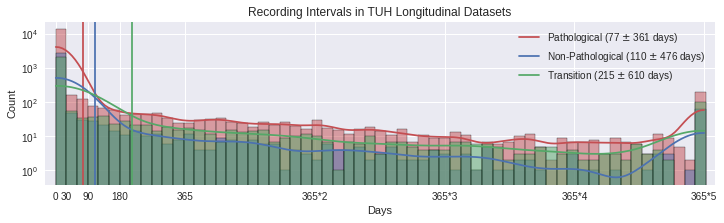

In [296]:
ax = plot_longitudinal_interval_hists(description)
# ax.get_figure().savefig('/home/jovyan/recording_intervals.jpg', dpi=300, bbox_inches='tight')